### N-dim

In [8]:
import numpy as np

def f(x):
    return np.sum(x**2)

def df(x):
    return 2 * x

# Constraint: ||x - c|| <= R
def g(x, R, c):
    return np.linalg.norm(x - c) - R

# Gradient of g(x) w.r.t. x
def dg(x, c):
    return 2 * (x - c)

def kkt_sgd(x_init, R, c, alpha, beta, max_iter, tol):
    x = x_init
    lambda_ = 0
    
    x_vals = [x_init]
    lambda_vals = [lambda_]
    for _ in range(max_iter):
        grad_f = df(x)
        grad_g = dg(x, c)
        
        x_new = x - alpha * (grad_f + lambda_ * grad_g)
        
        lambda_new = max(0, lambda_ + beta * g(x, R, c))
        
        if np.linalg.norm(x_new - x) < tol and np.abs(lambda_new - lambda_) < tol:
            break
            
        x = x_new
        lambda_ = lambda_new

        x_vals.append(x)
        lambda_vals.append(lambda_)
        
    return x, x_vals, lambda_vals

n = 1
x_init = np.zeros(n)-1
R = 0.6
c = np.ones(n)
alpha = 0.1
beta = 0.1
max_iter = 10000
tol = 1e-6

x_opt, x_vals, lambda_vals = kkt_sgd(x_init, R, c, alpha, beta, max_iter, tol)
f_max = f(x_opt)
print(f"Optimal value of x: {x_opt}")
print(f"Maximum value of f: {f_max}")
dist = np.linalg.norm(x_opt - c)
print(f"Distance at optimal x: {dist}")


Optimal value of x: [0.40000989]
Maximum value of f: 0.16000791375893123
Distance at optimal x: 0.5999901079236525


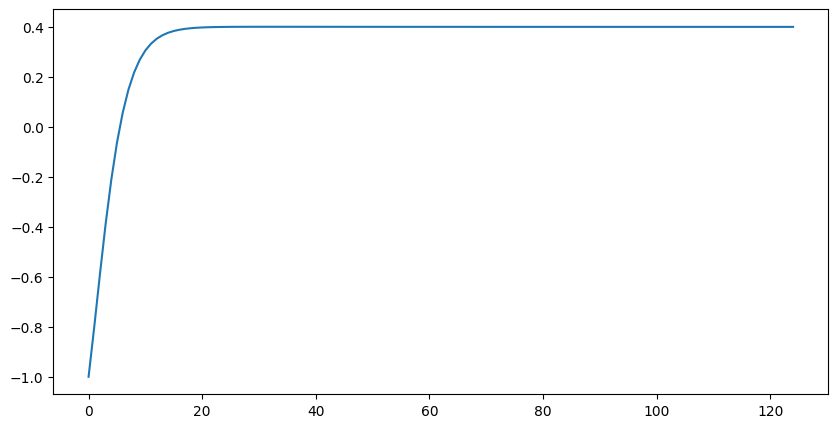

In [9]:
import matplotlib.pyplot as plt
# Plot x_vals
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(x_vals, label='x')

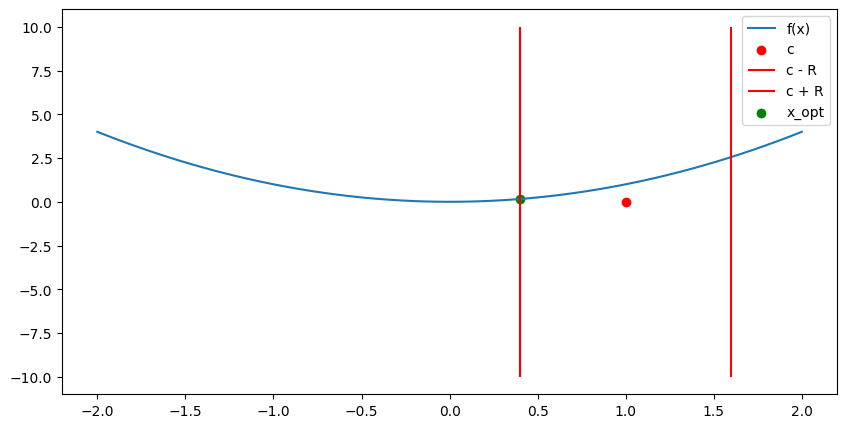

In [10]:
# plot f
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-2, 2, 100)
y = [f(x_) for x_ in x]
plt.plot(x, y, label='f(x)')

# Show constraint set
plt.scatter([c], [0], label='c', color='r')
# Vertical lines
plt.vlines(c - R, -10, 10, label='c - R', color='r')
plt.vlines(c + R, -10, 10, label='c + R', color='r')

# X final
plt.scatter([x_opt], [f(x_opt)], label='x_opt', color='g')

plt.legend()


### Multivariate distance

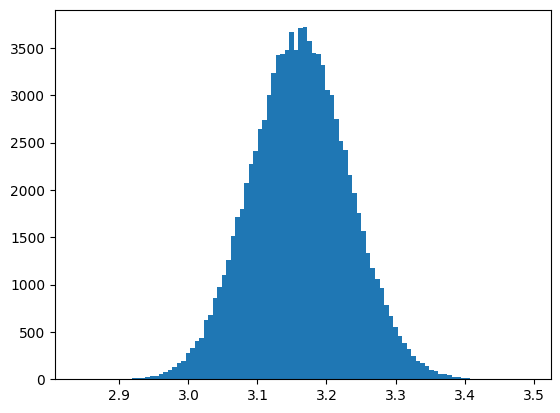

In [271]:
dim = 1000
n_points = 100000
sigma = 0.1

# Generate data
X = np.random.randn(n_points, dim) * sigma
# Get norm of each point
X_norm = np.linalg.norm(X, axis=1)

plt.hist(X_norm, bins=100);

In [272]:
# Get quantile function for chi-squared distribution
from scipy.stats import chi

quant = 0.95
# quant = 0.5

q = chi.ppf(quant, dim, scale=sigma)
print(f"Quantile {quant} for chi-squared distribution: {q:.2f}")

X_sphere = X[X_norm < q]
ratio = len(X_sphere) / len(X)
print(f"Ratio of points inside the sphere: {(ratio*100):.2f}")

Quantile 0.95 for chi-squared distribution: 3.28
Ratio of points inside the sphere: 94.91


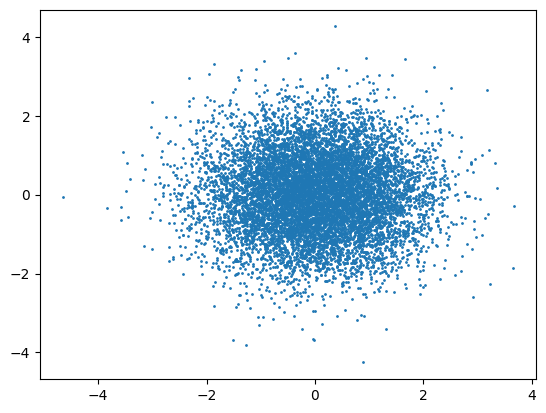

In [246]:
# Scatter
plt.scatter(X[:, 0], X[:, 1], s=1);